# Overexpression of Genes

In [1]:
%run 2.Ecoli_model.ipynb

Putrescine
ptrc_p
Putrescine
ptrc_c
Putrescine
ptrc_e
9.564770642201834
N-Acetyl-L-glutamate 5-semialdehyde
acg5sa_c
N2-Succinyl-L-glutamate 5-semialdehyde
sucgsa_c
L-Glutamate 5-semialdehyde
glu5sa_c
Ornithine
orn_e
Ornithine
orn_p
Ornithine
orn_c
2-Oxoglutarate
akg_e
2-Oxoglutarate
akg_c
2-Oxoglutarate
akg_p
L-Glutamate 1-semialdehyde
glu1sa_c
L-Glutamate
glu__L_c
L-Glutamate 5-semialdehyde
glu5sa_c
L-Glutamate
glu__L_e
L-Glutamate
glu__L_p
L-Glutamate 5-phosphate
glu5p_c
glu5sa_c + glu__L_c --> akg_c + orn_c
53.02333333333343
45.78742857142842
9.929142857142859
L-Arginine
arg__L_c
L-Arginine
arg__L_e
L-Arginine
arg__L_p
Urea CH4N2O
urea_c
Urea CH4N2O
urea_p
Urea CH4N2O
urea_e
H2O H2O
h2o_p
H2O H2O
h2o_c
H2O H2O
h2o_e
arg__L_c + h2o_c --> orn_c + urea_c
9.929142857142859


In [3]:
from cobra.flux_analysis import flux_variability_analysis
reactions_OE = [model.reactions.OAT, model.reactions.ORNDC, model.reactions.EX_ptrc_e]
fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
print(fva)

           minimum   maximum
OAT            0.0  9.503676
ORNDC          0.0  9.269948
EX_ptrc_e      0.0  1.013652


In [ ]:
#Fake higher bounds

In [5]:
with model:
    model.reactions.OAT.lower_bound = 2
    model.reactions.ORNDC.lower_bound = 1
    model.reactions.EX_ptrc_e.lower_bound = 1
    reactions_OE = [model.reactions.OAT, model.reactions.ORNDC, model.reactions.EX_ptrc_e]
    fva = flux_variability_analysis(model, reaction_list = reactions_OE, fraction_of_optimum=0.9)
    print(fva)
    

           minimum   maximum
OAT            2.0  9.756014
ORNDC          1.0  9.546480
EX_ptrc_e      1.0  1.973728


In [6]:
#FSEOF

In [7]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [8]:
fseof = FSEOF(model)

In [9]:
result = fseof.run(target=model.reactions.EX_ptrc_e)

In [11]:
result.data_frame

,1,2,3,4,5,6,7,8,9,10
G5SD,1.307397,2.161015,3.014633,3.868236,4.721579,5.574921,6.427579,7.279311,8.131043,8.982774
CS,6.793494,6.693019,6.592544,6.492655,6.402574,6.312493,6.613626,7.420103,8.226580,9.033057
ICDHyr,6.793494,6.693019,6.592544,6.492655,6.402574,6.312493,6.613626,7.420103,8.226580,9.033057
VALTA,-0.804581,-0.726792,-0.649004,-0.571185,-0.492860,-0.414535,-0.334879,-0.253422,-0.171965,-0.090508
PFK_3,6.531382,6.879934,7.228487,7.544862,7.323009,7.101156,7.235017,7.873109,8.511202,9.149294
...,...,...,...,...,...,...,...,...,...,...
BTS5,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000
VPAMTr,-0.465809,-0.420773,-0.375738,-0.330685,-0.285339,-0.239994,-0.193877,-0.146717,-0.099558,-0.052399
I2FE2SR,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000
OAT,1.130426,2.001154,2.871882,3.742602,4.613172,5.483743,6.353921,7.223570,8.093218,8.962867


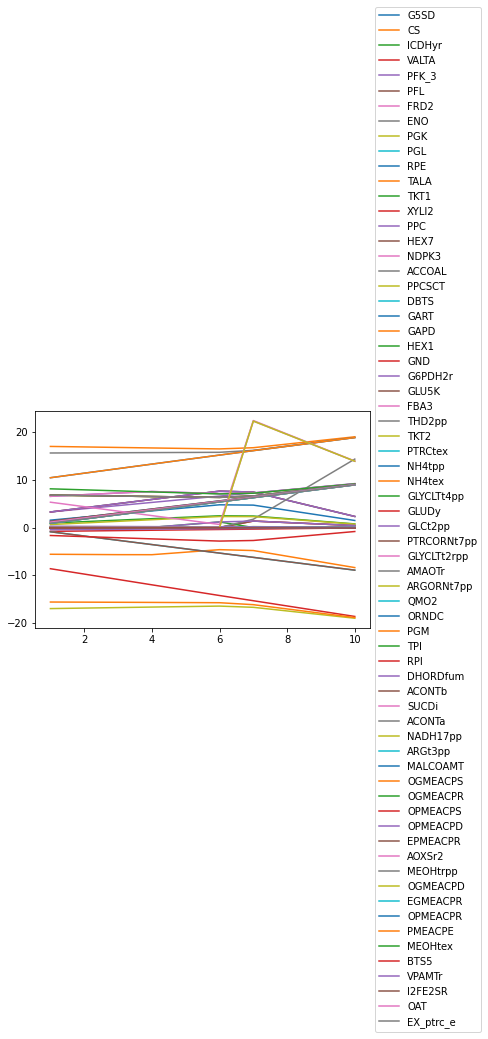

In [13]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#DFVA

In [ ]:
#get a reference state

In [14]:
from cameo.strain_design.deterministic import DifferentialFVA